In [1]:
pwd

u'C:\\Users\\Wasit\\Documents\\GitHub\\grade_analysis\\scikit'

In [3]:
import pandas as pd
import numpy as np
import pickle
df_csv= pd.read_pickle("../df_noplus/df5.pkl")

ImportError: No module named indexes.base

In [111]:
all_subjects=df_csv['COURSEID'].value_counts()
##removing any subject enrolled less than 20 times
m20=all_subjects[all_subjects[:]>=20]
print df_csv.shape
df_csv=df_csv[df_csv["COURSEID"].isin(m20.index)]
print df_csv.shape

(28272, 199)
(27994, 199)


In [112]:
df=df_csv[df_csv['COURSEID']=='CS213']
#df["COURSEID"].value_counts()
#df=pd.read_csv('../df_m20/df_CS213.csv',index_col=0)
df=df.iloc[np.random.permutation(len(df))]

In [113]:
x_head=df.columns[4:]
y_head=['GRADE']
print x_head
print y_head
x=df.as_matrix(x_head)
y=df.as_matrix(y_head).T[0]

Index([u'AN201', u'AS171', u'AS177', u'AS178', u'AT207', u'AT316', u'AT326',
       u'AT336', u'AT346', u'AT366',
       ...
       u'TU110', u'TU111', u'TU115', u'TU116', u'TU120', u'TU122', u'TU130',
       u'TU153', u'TU154', u'TU156'],
      dtype='object', length=195)
['GRADE']


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score

clf_dt = DecisionTreeClassifier(max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_dt, x, y, cv=5)
print scores
print "--Decision Tree: %s"%scores.mean()

clf_rf=RandomForestClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_rf, x, y, cv=5)
print scores
print "--Random Forest: %s"%scores.mean()

clf_et = ExtraTreesClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_et, x, y, cv=5)
print scores
print "--Extra Tree: %s"%scores.mean()

clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, x, y, cv=5)
print scores
print "--SVM: %s"%scores.mean()

[ 0.52258065  0.37012987  0.44078947  0.44736842  0.44078947]
--Decision Tree: 0.444331576742
[ 0.50322581  0.48701299  0.5         0.43421053  0.46052632]
--Random Forest: 0.476995127114
[ 0.47096774  0.44155844  0.5         0.47368421  0.47368421]
--Extra Tree: 0.471978920909
[ 0.49032258  0.50649351  0.51973684  0.46710526  0.51973684]
--SVM: 0.500679006901


In [115]:
scores.mean()

0.50067900690141776

In [1]:
h=5
clf_et.fit(x[len(y)/h:],y[len(y)/h:])
dif=[];
clmax=9
cm=np.zeros((clmax,clmax))
yp=[]
ya=[]
for i in xrange(len(y)/h):
    gp=clf_et.predict(x[i,:])[0]
    ga=y[i]
    yp.append(gp)
    ya.append(ga)
    cm[gp,ga] +=1
    dif.append(ga-gp)
    print "actual: %d, prediction: %d"%(ga,gp)
print "***confusion matrix"
print cm

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(ya, yp))
print(rms)

NameError: name 'clf_et' is not defined

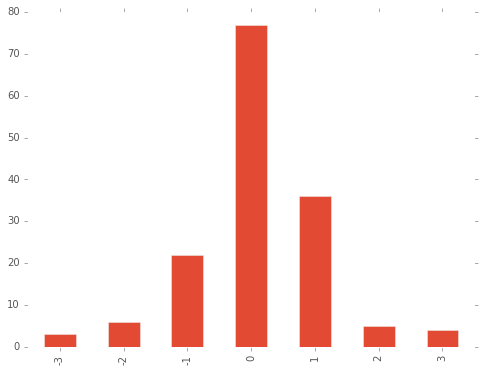

In [117]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df_dif=pd.DataFrame({'dif':dif})
plt.rcParams['figure.figsize'] = (8,6)
df_dif.dif.value_counts().sort_index().plot(kind='bar')

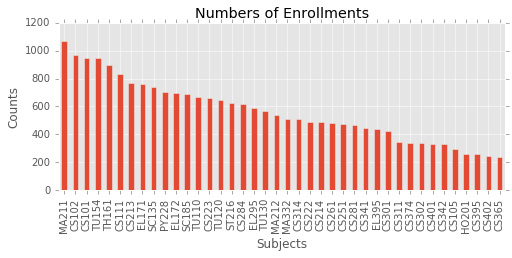

In [175]:
## real experiment starts here
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,3)
plt.title("Numbers of Enrollments")
plt.xlabel("Subjects")
plt.ylabel("Counts")
m20.head(40).plot(kind='bar')

In [119]:
from sklearn.metrics import mean_squared_error

df_rms = pd.DataFrame(m20.copy(), columns=['DT'])
df_rms['RF'] = m20.copy()
df_rms['ET'] = m20.copy()
df_rms['SVM'] = m20.copy()

for subject,count in m20.iteritems():
    print "%s "%subject,
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    
    #1st partition for training  
    x1=x[len(y)/5:]   
    y1=y[len(y)/5:]
    
    #2nd partition for testing
    x2=x[:len(y)/5] 
    y2=y[:len(y)/5]
    
    ##evaluate rms
    clf_dt.fit(x1,y1)
    df_rms['DT'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_dt.predict(x2) ))
    
    clf_rf.fit(x1,y1)
    df_rms['RF'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_rf.predict(x2) ))
    
    clf_et.fit(x1,y1)
    df_rms['ET'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_et.predict(x2) ))
    
    clf_svm.fit(x1,y1)
    df_rms['SVM'].loc[subject]= np.sqrt(mean_squared_error( y2, clf_svm.predict(x2) ))
    
    
import datetime
tsp= datetime.datetime.now().strftime("%y%m%d_%H%M")
df_rms.to_pickle("df_rms"+tsp+".pkl")

MA211  CS102  CS101  TU154  TH161  CS111  CS213  EL171  SC135  PY228  EL172  SC185  TU110  CS223  TU120  ST216  CS284  EL295  TU130  MA212  MA332  CS314  CS222  CS214  CS261  CS251  CS281  CS341  EL395  CS301  CS311  CS374  CS302  CS401  CS342  CS105  HO201  CS395  CS402  CS365  EL070  AT326  TU100  CS289  CS385  AT316  CS326  TU122  CS288  CS487  CS211  CS489  SC123  SC173  CS296  CS488  SW111  CS367  SW365  CS486  SW212  CS409  SW221  CS215  CS386  CS366  CS295  CS377  LA209  CS456  CS467  CS300  SW478  SW213  MW314  BA291  SW475  CS396  CS427  ES356  CS387  CS286  CS297  CS429  CS446  SW335  CS356  HR201  CS459  SO201  NS132  TA395  CJ321  CS397  CS398  CS348  CJ317  MW313  CJ316  MA216  CS407  CS115  CS457  CS388  CS426  CS449  CS408  CJ315  CS285  CS399 


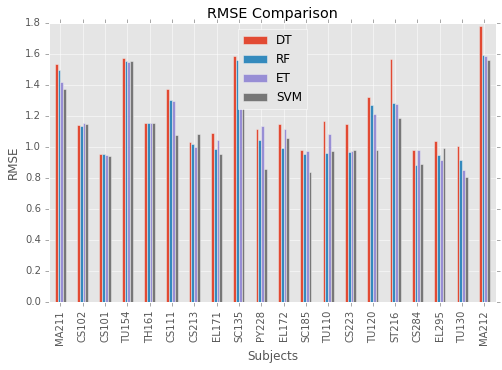

In [126]:
df_rms.head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,5)
plt.title("RMSE Comparison")
plt.xlabel("Subjects")
plt.ylabel("RMSE")

In [128]:
df_accuracy = pd.DataFrame(m20.copy(), columns=['DT'])
df_accuracy['RF'] = m20.copy()
df_accuracy['ET'] = m20.copy()
df_accuracy['SVM'] = m20.copy()

for subject,count in m20.iteritems():
    print "%s "%subject,
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    ##evaluation accuracy
    df_accuracy['DT'].loc[subject]=cross_val_score(clf_dt, x, y, cv=5).mean()
    df_accuracy['RF'].loc[subject]=cross_val_score(clf_rf, x, y, cv=5).mean()
    df_accuracy['ET'].loc[subject]=cross_val_score(clf_et, x, y, cv=5).mean()
    df_accuracy['SVM'].loc[subject]=cross_val_score(clf_svm, x, y, cv=5).mean()

import datetime
tsp= datetime.datetime.now().strftime("%y%m%d_%H%M")
df_accuracy.to_pickle("df_accuracy"+tsp+".pkl")
df_accuracy.to_pickle("df_accuracy.pkl")

MA211  CS102  CS101  TU154  TH161  CS111  CS213  EL171  SC135  PY228  EL172  SC185  TU110  CS223  TU120  ST216  CS284  EL295  TU130  MA212  MA332  CS314  CS222  CS214  CS261  CS251  CS281  CS341  EL395  CS301  CS311  CS374  CS302  CS401  CS342  CS105  HO201  CS395  CS402  CS365  EL070  AT326  TU100  CS289  CS385  AT316  CS326  TU122  CS288  CS487  CS211  CS489  SC123  SC173  CS296  CS488  SW111  CS367  SW365  CS486  SW212  CS409  SW221  CS215  CS386  CS366  CS295  CS377  LA209  CS456  CS467  CS300  SW478  SW213  MW314  BA291  SW475  CS396  CS427  ES356  CS387  CS286  CS297  CS429  CS446  SW335  CS356  HR201  CS459  SO201  NS132  TA395  CJ321  CS397  CS398  CS348  CJ317  MW313  CJ316  MA216  CS407  CS115  CS457  CS388  CS426  CS449  CS408  CJ315  CS285  CS399 


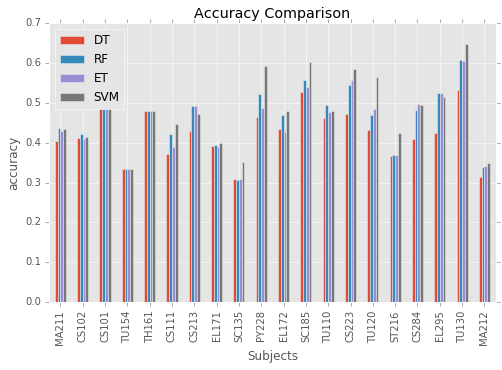

In [129]:
df_accuracy= pd.read_pickle("df_accuracy.pkl")
df_accuracy.head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,5)
plt.title("Accuracy Comparison")
plt.xlabel("Subjects")
plt.ylabel("accuracy")


In [146]:
df_compare_weka=df_accuracy.head(10).copy()
df_compare_weka['SVMw'] = pd.Series()
df_compare_weka['RFw'] = pd.Series()

df_compare_weka['SVMw'].loc['MA211']=44.1011
df_compare_weka['SVMw'].loc['CS102']=41.4079
df_compare_weka['SVMw'].loc['CS101']=53.7975
df_compare_weka['SVMw'].loc['TU154']=33.7209
df_compare_weka['SVMw'].loc['TH161']=48.0534
df_compare_weka['SVMw'].loc['CS111']=44.8441
df_compare_weka['SVMw'].loc['CS213']=47.7124
df_compare_weka['SVMw'].loc['EL171']=40.2632
df_compare_weka['SVMw'].loc['SC135']=35.2703
df_compare_weka['SVMw'].loc['PY228']=60.1418

df_compare_weka['RFw'].loc['MA211']= 42.3221
df_compare_weka['RFw'].loc['CS102']= 41.5114
df_compare_weka['RFw'].loc['CS101']= 53.481
df_compare_weka['RFw'].loc['TU154']= 33.5095
df_compare_weka['RFw'].loc['TH161']= 48.0534
df_compare_weka['RFw'].loc['CS111']= 45.4436
df_compare_weka['RFw'].loc['CS213']= 48.7582
df_compare_weka['RFw'].loc['EL171']= 39.2105
df_compare_weka['RFw'].loc['SC135']= 32.027
df_compare_weka['RFw'].loc['PY228']= 52.0567


df_compare_weka['SVMw'] = df_compare_weka['SVMw']*0.01
df_compare_weka['RFw'] = df_compare_weka['RFw']*0.01

In [147]:
df_compare_weka

,DT,RF,ET,SVM,SVMw,RFw
MA211,0.403609,0.436395,0.428927,0.435537,0.441011,0.423221
CS102,0.41099,0.421370,0.409932,0.414072,0.414079,0.415114
CS101,0.528506,0.538030,0.531675,0.538002,0.537975,0.534810
TU154,0.33508,0.335058,0.335052,0.334028,0.337209,0.335095
TH161,0.480568,0.480568,0.480568,0.480568,0.480534,0.480534
CS111,0.370669,0.423144,0.388378,0.447242,0.448441,0.454436
CS213,0.430282,0.491580,0.492623,0.471919,0.477124,0.487582
EL171,0.392107,0.393362,0.389545,0.399866,0.402632,0.392105
SC135,0.308121,0.306561,0.308171,0.351554,0.352703,0.320270
PY228,0.465338,0.523437,0.486484,0.591465,0.601418,0.520567


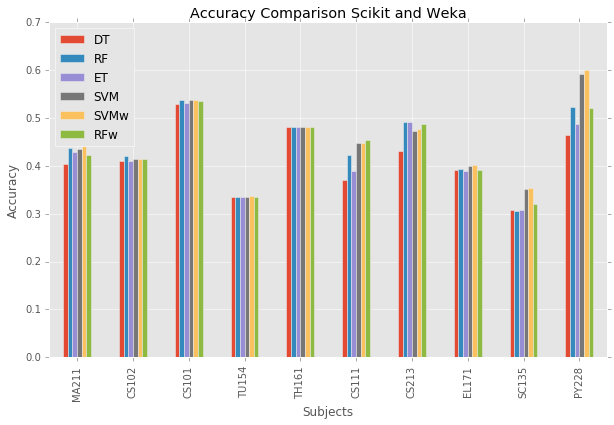

In [169]:
df_compare_weka.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,6)
plt.title("Accuracy Comparison Scikit and Weka")
plt.xlabel("Subjects")
plt.ylabel("Accuracy")

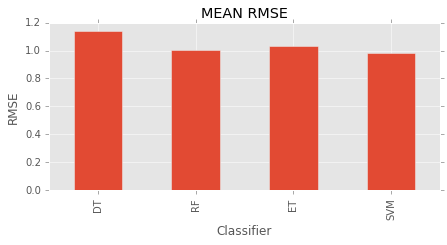

In [156]:
df_rms.mean().plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,3)
plt.title("MEAN RMSE")
plt.xlabel("Classifier")
plt.ylabel("RMSE")

In [157]:
df_rms.mean()

DT     1.142645
RF     1.001157
ET     1.031549
SVM    0.980141
dtype: float64

In [158]:
df_accuracy.mean()

DT     0.484280
RF     0.529817
ET     0.519093
SVM    0.544049
dtype: float64